# Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

![DataFrame的索引选项](http://upload-images.jianshu.io/upload_images/7178691-64354f2ab777bd8c.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Handling Missing Data

In [3]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
pd.isnull(np.nan) + pd.isnull(None)
#None和np.nan都是空

2

In [5]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

> 在pandas中，我们采用了R语言中的惯用法，即将缺失值表示为NA，它表示不可用not available。在统计应用中，NA数据可能是不存在的数据或者虽然存在，但是没有观察到（例如，数据采集中发生了问题）。当进行数据清洗以进行分析时，最好直接对缺失数据进行分析，以判断数据采集的问题或缺失数据可能导致的偏差。

In [6]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [7]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

### Filtering Out Missing Data

<mark>python中内置的NA为None，pandas中内置的为np.nan，如果想使用NA，需要nan as NA</mark>

In [8]:
from numpy import nan as NA

In [9]:
data = pd.Series([1, None, 3.5, None, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [10]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [13]:
data.dropna(how='all')
#传入how='all'将只丢弃全为NA的那些行：

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [15]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [16]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [17]:
df.dropna()

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [18]:
df.dropna(thresh=2)
#Keep only the rows with at least 2 non-NA values.

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


### Filling In Missing Data

In [19]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [20]:
df.fillna({1: 0.5, 2: 0})
# 不同列取不同的填补值

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [21]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [22]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


In [23]:
df.fillna(method='ffill')

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.124121,-2.370232


In [24]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


In [25]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Data Transformation

### Removing Duplicates

In [31]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [33]:
data.duplicated() # default keep first

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [34]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [35]:
data['v1'] = range(7)
data.drop_duplicates(subset = ['k1'])
#也可以只通过某一列或某几列判断

,k1,k2,v1
0,one,1,0
1,two,1,1


In [36]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [37]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [38]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [39]:
lowercased = data['food'].str.lower() #小写转换
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

<mark>map can use func or dict</mark>

In [40]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [41]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [42]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [43]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [44]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

> 要让每个值有不同的替换值，可以传递一个替换列表：

In [45]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [47]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming Axis Indexes

In [48]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [49]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [50]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


> 如果想要创建数据集的转换版（而不是修改原始数据），比较实用的方法是rename：

> rename可以结合字典型对象实现对部分轴标签的更新：

<mark>rename can take dict or func</mark>

In [53]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [54]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [55]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretization and Binning

In [64]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [65]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

> pandas返回的是一个特殊的Categorical对象。结果展示了pandas.cut划分的面元。你可以将其看做一组表示面元名称的字符串。它的底层含有一个表示不同分类名称的类型数组，以及一个codes属性中的年龄数据的标签：

In [66]:
cats.codes
#原list的归属

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [67]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [68]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [69]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [71]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [72]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

> 如果向cut传入的是面元的数量而不是确切的面元边界，则它会根据数据的最小值和最大值计算等长面元。下面这个例子中，我们将一些均匀分布的数据分成四组：

In [74]:
data = np.random.rand(20)
pd.value_counts(pd.cut(data, 4, precision = 2))

(0.51, 0.75]     7
(0.75, 0.99]     5
(0.27, 0.51]     4
(0.024, 0.27]    4
dtype: int64

> <mark>qcut是一个非常类似于cut的函数，它可以根据样本分位数对数据进行面元划分。根据数据的分布情况，cut可能无法使各个面元中含有相同数量的数据点。而qcut由于使用的是样本分位数，因此可以得到大小基本相等的面元：</mark>

In [41]:
pd.qcut?

In [75]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats

[(-0.0171, 0.624], (0.624, 3.928], (-2.9499999999999997, -0.691], (-2.9499999999999997, -0.691], (-2.9499999999999997, -0.691], ..., (-0.0171, 0.624], (-0.0171, 0.624], (-2.9499999999999997, -0.691], (0.624, 3.928], (0.624, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.691] < (-0.691, -0.0171] < (-0.0171, 0.624] < (0.624, 3.928]]

In [76]:
pd.value_counts(cats)

(0.624, 3.928]                   250
(-0.0171, 0.624]                 250
(-0.691, -0.0171]                250
(-2.9499999999999997, -0.691]    250
dtype: int64

In [77]:
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

(-0.0171, 1.289]                 400
(-1.212, -0.0171]                400
(1.289, 3.928]                   100
(-2.9499999999999997, -1.212]    100
dtype: int64

### Detecting and Filtering Outliers

In [78]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.056093,0.045942,0.022049,-0.003390
std,0.998561,0.995332,1.009192,0.994693
min,-3.428254,-3.645860,-3.184377,-3.745356
25%,-0.747963,-0.599807,-0.628122,-0.697084
50%,-0.100609,0.047101,-0.019893,-0.029924
75%,0.622384,0.746527,0.695298,0.694459
max,3.366626,2.653656,3.525865,2.735527


In [79]:
col = data[2]
col[np.abs(col) > 3] #此处用np

67     3.260383
242   -3.056990
329   -3.184377
789    3.525865
Name: 2, dtype: float64

In [80]:
data[(np.abs(data) > 3).any(1)] # all the rows

,0,1,2,3
48,-2.315555,0.457246,-0.025907,-3.399312
67,0.050188,1.951312,3.260383,0.963301
143,0.146326,0.508391,-0.196713,-3.745356
242,-0.293333,-0.242459,-3.056990,1.918403
266,-3.428254,-0.296336,-0.439938,-0.867165
329,0.275144,1.179227,-3.184377,1.369891
551,-0.362528,-3.548824,1.553205,-2.186301
643,3.366626,-2.372214,0.851010,1.332846
789,-0.658090,-0.207434,3.525865,0.283070
810,0.599947,-3.645860,0.255475,-0.549574


In [82]:
(np.abs(data) > 3).any(1)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [59]:
# np.sign?

In [83]:
data[np.abs(data) > 3] = np.sign(data) * 3 #np.sign返回1或-1
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.056031,0.047137,0.021505,-0.002245
std,0.996012,0.991302,1.005952,0.990874
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.747963,-0.599807,-0.628122,-0.697084
50%,-0.100609,0.047101,-0.019893,-0.029924
75%,0.622384,0.746527,0.695298,0.694459
max,3.000000,2.653656,3.000000,2.735527


In [84]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,-1.0
1,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,-1.0


### Permutation and Random Sampling

In [49]:
df.sample?

In [4]:
df = pd.DataFrame(np.arange(5*4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([3, 0, 2, 1, 4])

In [3]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [64]:
df.iloc[sampler]

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
0,0,1,2,3


In [65]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
0,0,1,2,3


In [67]:
#d.take? 有些像iloc

In [5]:
df.sample(n=3) #直接随机取三个sample

,0,1,2,3
4,16,17,18,19
0,0,1,2,3
3,12,13,14,15


In [6]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws #replace=True, 允许重复选择

1    7
3    6
1    7
3    6
0    5
2   -1
1    7
3    6
2   -1
1    7
dtype: int64

### Computing Indicator/Dummy Variables

In [7]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})

In [8]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [9]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


> 有时候，你可能想给指标DataFrame的列加上一个前缀，以便能够跟其他数据进行合并。get_dummies的prefix参数可以实现该功能：

In [10]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [56]:
pd.get_dummies?

In [30]:
# !cat datasets/movielens/movies.dat

In [11]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

/Users/changsu/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [13]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [14]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [15]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [16]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [17]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                      1
title                          Toy Story (1995)
genres              Animation|Children's|Comedy
Genre_Animation                               1
Genre_Children's                              1
                               ...             
Genre_War                                     0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Film-Noir                               0
Genre_Western                                 0
Name: 0, Length: 21, dtype: object

In [18]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.9296, 0.3164, 0.1839, 0.2046, 0.5677, 0.5955, 0.9645, 0.6532,
       0.7489, 0.6536])

In [19]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String Manipulation

### String Object Methods

In [20]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [61]:
val.split?

In [21]:
pieces = [x.strip() for x in val.split(',')] #去除头尾空格
pieces

['a', 'b', 'guido']

In [22]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [23]:
val.join?

Signature: val.join(iterable, /)
Docstring:
Concatenate any number of strings.

The string whose method is called is inserted in between each given string.
The result is returned as a new string.

Example: '.'.join(['ab', 'pq', 'rs']) -> 'ab.pq.rs'
Type:      builtin_function_or_method


In [24]:
'::'.join(pieces)

'a::b::guido'

In [26]:
'guido' in val

True

In [27]:
val.index(',')

1

In [28]:
val.find(':')

-1

> 注意find和index的区别：如果找不到字符串，index将会引发一个异常（而不是返回－1）：

In [29]:
# val.index(':')

In [30]:
val.count(',')

2

In [31]:
val.replace(',', '::')

'a::b::  guido'

In [32]:
val.rstrip?

Signature: val.rstrip(chars=None, /)
Docstring:
Return a copy of the string with trailing whitespace removed.

If chars is given and not None, remove characters in chars instead.
Type:      builtin_function_or_method


In [33]:
val.replace(',', '')

'ab  guido'

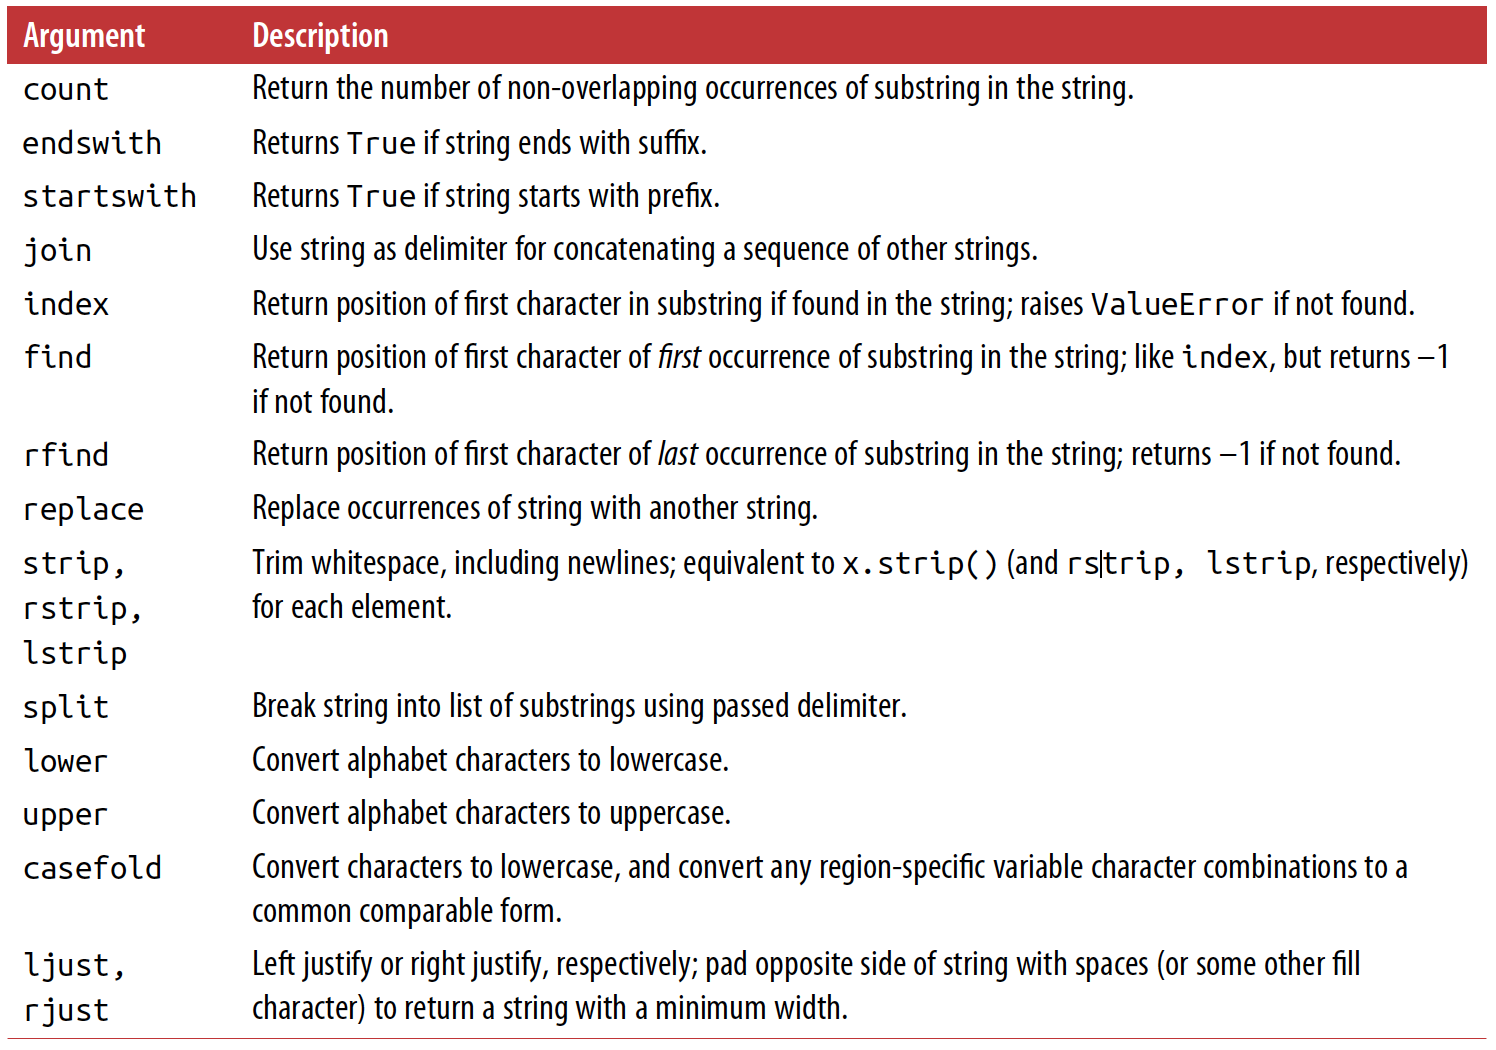

### Regular Expressions

> 正则表达式提供了一种灵活的在文本中搜索或匹配（通常比前者复杂）字符串模式的方式。正则表达式，常称作regex，是根据正则表达式语言编写的字符串。Python内置的re模块负责对字符串应用正则表达式。

In [37]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

> re模块的函数可以分为三个大类：模式匹配、替换以及拆分。当然，它们之间是相辅相成的。一个regex描述了需要在文本中定位的一个模式，它可以用于许多目的。

> 调用re.split('\s+',text)时，正则表达式会先被编译，然后再在text上调用其split方法。你可以用re.compile自己编译regex以得到一个可重用的regex对象：

In [38]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [39]:
regex.findall(text)

['    ', '\t ', '  \t']

> 笔记：如果想避免正则表达式中不需要的转义（\），则可以使用原始字符串字面量如r'C:\x'（也可以编写其等价式'C:\x'）。

> 如果打算对许多字符串应用同一条正则表达式，强烈建议通过re.compile创建regex对象。这样将可以节省大量的CPU时间。

> match和search跟findall功能类似。findall返回的是字符串中所有的匹配项，而search则只返回第一个匹配项。match更加严格，它只匹配字符串的首部。来看一个小例子，假设我们有一段文本以及一条能够识别大部分电子邮件地址的正则表达式：

In [40]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [41]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [42]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [43]:
text[m.start():m.end()]

'dave@google.com'

In [44]:
print(regex.match(text))

None


In [45]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [46]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [47]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [48]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

> sub还能通过诸如\1、\2之类的特殊符号访问各匹配项中的分组。符号\1对应第一个匹配的组，\2对应第二个匹配的组，以此类推：

In [49]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



![正则表达式](http://upload-images.jianshu.io/upload_images/7178691-efbb80a793759fc0.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

### Vectorized String Functions in pandas

In [50]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [51]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

> 通过data.map，所有字符串和正则表达式方法都能被应用于（传入lambda表达式或其他函数）各个值，但是如果存在NA（null）就会报错。为了解决这个问题，Series有一些能够跳过NA值的面向数组方法，进行字符串操作。通过Series的str属性即可访问这些方法。例如，我们可以通过str.contains检查各个电子邮件地址是否含有"gmail"：

In [52]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [53]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [54]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [58]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [61]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [151]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

![部分矢量化字符串方法](http://upload-images.jianshu.io/upload_images/7178691-a634364ed6d5d5c5.png?imageMogr2/auto-orient/strip|imageView2/2/w/1240)

## Conclusion